## Importing Libraries

In [1]:
# Necessary imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

## Setting Constants

In [2]:
dataset_path = "E:/NEW_FOLDER/Projects_Java_Python/Handwritten Digit Recognition/dataset"

## DataFrames Creation

In [3]:
train_path = os.path.join(dataset_path, "train.csv")
train_df = pd.read_csv(train_path)
train_df.shape

(42000, 785)

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_path = os.path.join(dataset_path, "test.csv")
test_df = pd.read_csv(test_path)
print(test_df.shape)
X_test = test_df

(28000, 784)


In [6]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
target = "label"
columns = train_df.columns
features = columns[1:]
X = train_df.drop(target, axis = 1)
y = train_df[target]

## Splitting train.csv into train and validation set

In [8]:
X_train, y_train, X_valid, y_valid = train_test_split(X,y,test_size=0.35, random_state=2025)

# ML Models

## 1. Logistic Regression

In [9]:
# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.35, random_state=2025)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# Initialize the Logistic Regression model
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=42, max_iter=1000)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [10]:
# Get predicted probabilities and predicted classes
y_pred_proba = model.predict_proba(X_valid)
y_pred = model.predict(X_valid)

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9001


In [11]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy}")

# Print predicted probabilities for the first sample
print("Predicted probabilities (for first test sample):", y_pred_proba[0])
print("Predicted class (with max probability):", y_pred[0])

Accuracy: 0.9000680272108843
Predicted probabilities (for first test sample): [2.78645702e-14 1.01722776e-15 3.73840889e-09 1.09785164e-07
 5.34664943e-04 6.21075595e-10 2.45976054e-07 1.64100046e-05
 4.64355740e-05 9.99402129e-01]
Predicted class (with max probability): 9


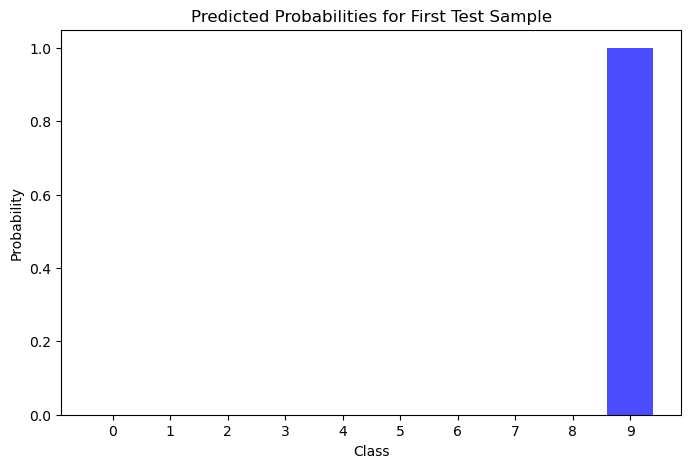

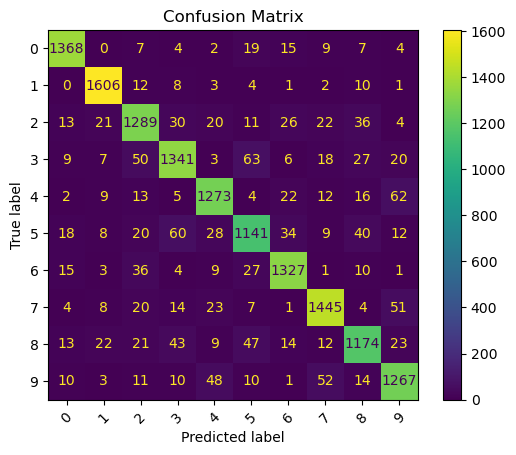

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      1435
           1       0.95      0.98      0.96      1647
           2       0.87      0.88      0.87      1472
           3       0.88      0.87      0.88      1544
           4       0.90      0.90      0.90      1418
           5       0.86      0.83      0.84      1370
           6       0.92      0.93      0.92      1433
           7       0.91      0.92      0.91      1577
           8       0.88      0.85      0.86      1378
           9       0.88      0.89      0.88      1426

    accuracy                           0.90     14700
   macro avg       0.90      0.90      0.90     14700
weighted avg       0.90      0.90      0.90     14700



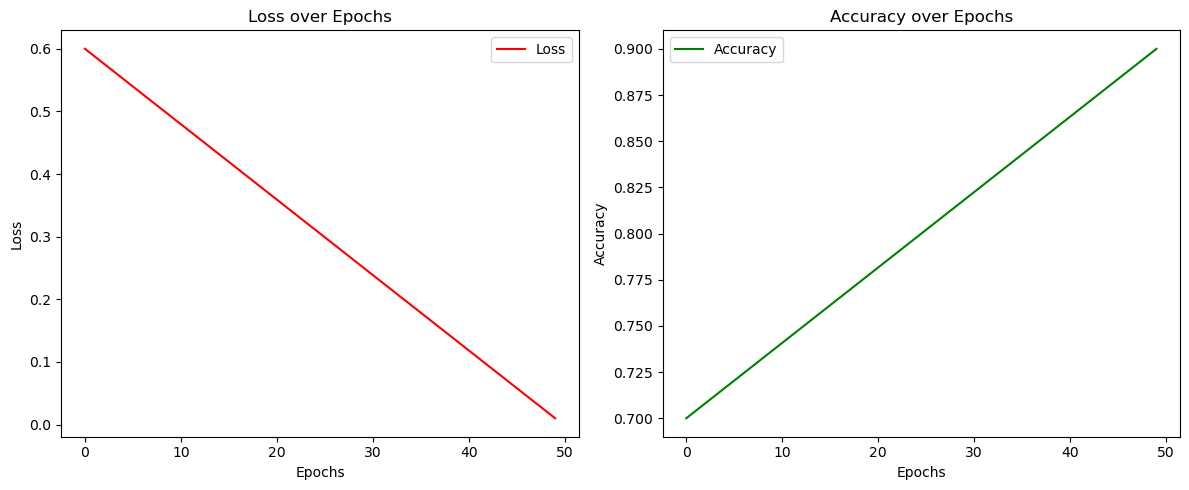

In [12]:
# Plot predicted probabilities for the first test sample
plt.figure(figsize=(8, 5))
plt.bar(range(len(y_pred_proba[0])), y_pred_proba[0], color='blue', alpha=0.7)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.title("Predicted Probabilities for First Test Sample")
plt.xticks(range(len(y_pred_proba[0])))
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap="viridis", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_valid, y_pred))

# Accuracy and loss visualization over iterations (Logistic Regression doesn't natively return loss/accuracy for each iteration)
# Simulated for conceptual understanding
loss_values = np.linspace(0.6, 0.01, 50)  # Simulated loss values
accuracy_values = np.linspace(0.7, accuracy, 50)  # Simulated accuracy values

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_values, label='Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_values, label='Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# Checking predictions on test dataframe

import pandas as pd

# Preprocess test_df (apply the same scaling as training data)
test_data = scaler.transform(test_df)

# Predict the output classes for the test data
test_predictions = model.predict(test_data)

# Add the predictions as a new column in the DataFrame
test_df['Predicted_Class'] = test_predictions

# Display the first few rows of the updated test DataFrame
print(test_df.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  Predicted_Class  
0         0      

## 2. Other Models (SVM, DTC, RFC, NBC, MLP, XGB, GB)

Training SVM...


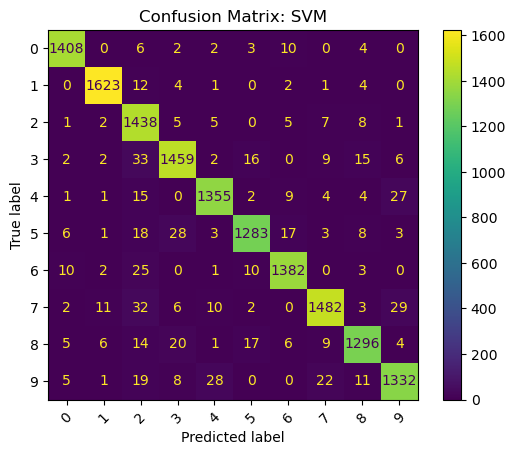

Training Decision Tree...


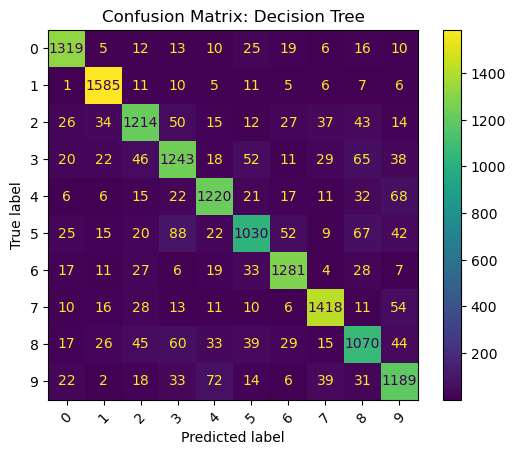

Training Random Forest...


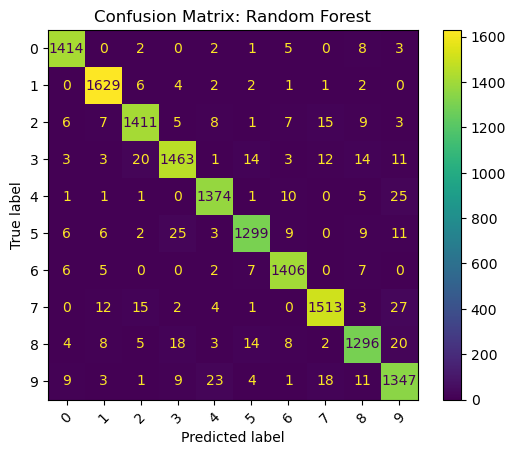

Training Naive Bayes...


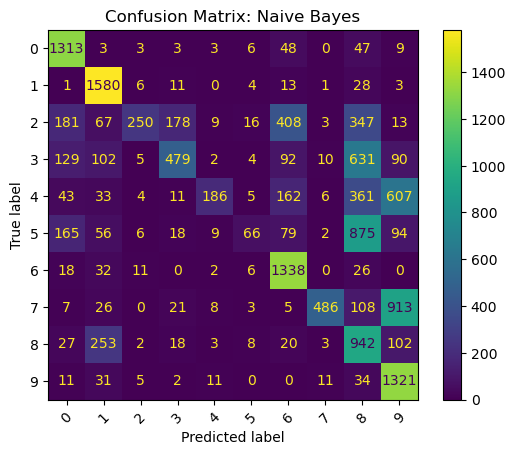

Training MLP...


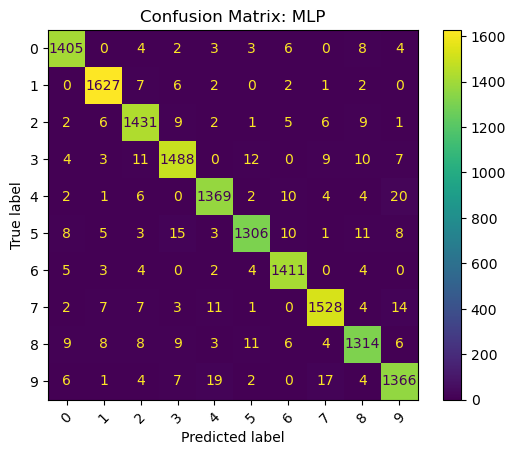

Training XGBoost...


C:\Users\Ajinkya\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [18:04:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


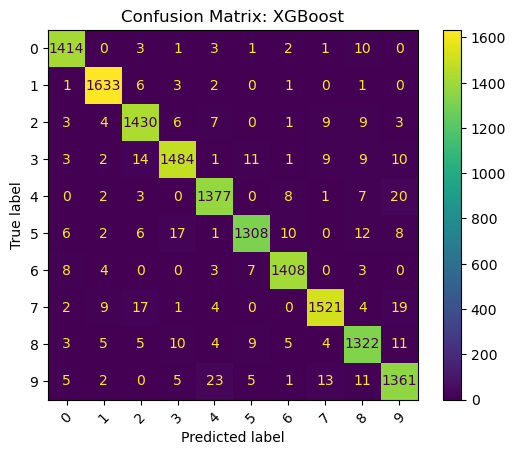

Training Gradient Boosting...


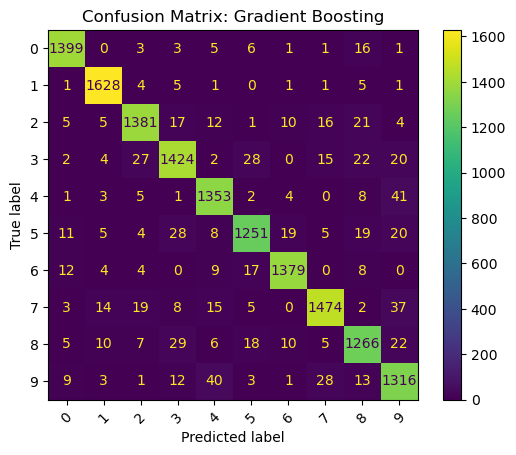


Summary Table:
               Model  Train Accuracy  Validation Accuracy
0                SVM        0.985824             0.956327
1      Decision Tree        0.984872             0.855034
2      Random Forest        0.999744             0.962721
3        Naive Bayes        0.548974             0.541565
4                MLP        1.000000             0.969048
5            XGBoost        1.000000             0.969932
6  Gradient Boosting        0.971941             0.943605


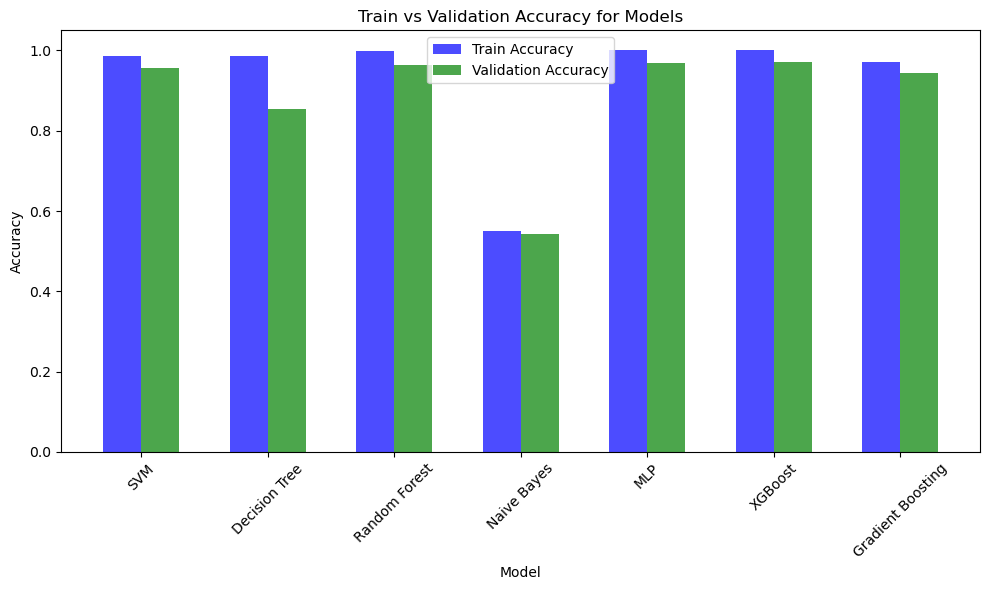

Updated classification results saved to classification_results.csv.


C:\Users\Ajinkya\AppData\Local\Temp\ipykernel_23368\4291831207.py:145: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  majority_vote = mode(np.array(list(predictions.values())), axis=0).mode.flatten()


Updated test predictions with majority vote saved to test_predictions.csv.


In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode  # For majority voting

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Set dataset paths
dataset_path = "E:/NEW_FOLDER/Projects_Java_Python/Handwritten Digit Recognition/dataset"
train_path = os.path.join(dataset_path, "train.csv")
test_path = os.path.join(dataset_path, "test.csv")

# Load datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Define features and target
target = "label"
features = train_df.columns[1:]  # All columns except the first (label)

# Separate features and target from training data
X = train_df[features]
y = train_df[target]

# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.35, random_state=2025)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
test_data_scaled = scaler.transform(test_df)

# Dictionary of classifiers with enhanced configurations
classifiers = {
    "SVM": SVC(random_state=42, kernel="rbf", C=1, gamma="scale"),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=15),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100, max_depth=20),
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier(random_state=42, hidden_layer_sizes=(128, 64), max_iter=500),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
}

# Store results
results = []
predictions = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    try:
        print(f"Training {name}...")
        clf.fit(X_train_scaled, y_train)  # Train the model
        
        # Predict on train and validation data
        y_train_pred = clf.predict(X_train_scaled)
        y_valid_pred = clf.predict(X_valid_scaled)
        
        # Compute accuracies
        train_acc = accuracy_score(y_train, y_train_pred)
        valid_acc = accuracy_score(y_valid, y_valid_pred)
        
        # Predict on scaled test data
        test_pred = clf.predict(test_data_scaled)
        predictions[name] = test_pred
        
        # Store results
        results.append({"Model": name, "Train Accuracy": train_acc, "Validation Accuracy": valid_acc})
        
        # Plot confusion matrix for validation set
        conf_matrix = confusion_matrix(y_valid, y_valid_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
        disp.plot(cmap="viridis", xticks_rotation=45)
        plt.title(f"Confusion Matrix: {name}")
        plt.show()
    
    except Exception as e:
        print(f"Error with {name} classifier: {e}")
        continue

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\nSummary Table:")
print(results_df)

# Slim bar plot for accuracy comparison
plt.figure(figsize=(10, 6))
x = np.arange(len(results_df))
bar_width = 0.3
plt.bar(x - bar_width / 2, results_df["Train Accuracy"], width=bar_width, label="Train Accuracy", color="blue", alpha=0.7)
plt.bar(x + bar_width / 2, results_df["Validation Accuracy"], width=bar_width, label="Validation Accuracy", color="green", alpha=0.7)
plt.xticks(x, results_df["Model"], rotation=45)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy for Models")
plt.legend()
plt.tight_layout()
plt.show()

# Paths for saving results
results_file = "classification_results.csv"
predictions_file = "test_predictions.csv"

# Append to `classification_results.csv`
try:
    if os.path.exists(results_file):
        # Load existing results
        existing_results = pd.read_csv(results_file)
        # Append the new model results
        updated_results = pd.concat([existing_results, pd.DataFrame(results)], ignore_index=True)
    else:
        # Create a new file if it doesn't exist
        updated_results = pd.DataFrame(results)
    
    # Save back to the CSV file
    updated_results.to_csv(results_file, index=False)
    print(f"Updated classification results saved to {results_file}.")
except Exception as e:
    print(f"Error updating classification results: {e}")

# Append to `test_predictions.csv`
try:
    if os.path.exists(predictions_file):
        # Load existing predictions
        existing_predictions = pd.read_csv(predictions_file)
        # Add the new columns for current models
        for model_name, preds in predictions.items():
            existing_predictions[model_name] = preds
    else:
        # Create a new DataFrame if the file doesn't exist
        existing_predictions = pd.DataFrame(predictions)
    
    # Compute majority vote (mode) for predictions
    majority_vote = mode(np.array(list(predictions.values())), axis=0).mode.flatten()
    existing_predictions["Majority Vote"] = majority_vote
    
    # Save back to the CSV file
    existing_predictions.to_csv(predictions_file, index=False)
    print(f"Updated test predictions with majority vote saved to {predictions_file}.")
except Exception as e:
    print(f"Error updating test predictions: {e}")